# Data Cleaning - Teams

In [4]:
import pandas as pd
from utils import *
import os

df = pd.read_csv('../data/raw/teams.csv')
init_num_rows = df.shape[0]

print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

df.head()

Number of rows: 142
Number of columns: 61


,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


## Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

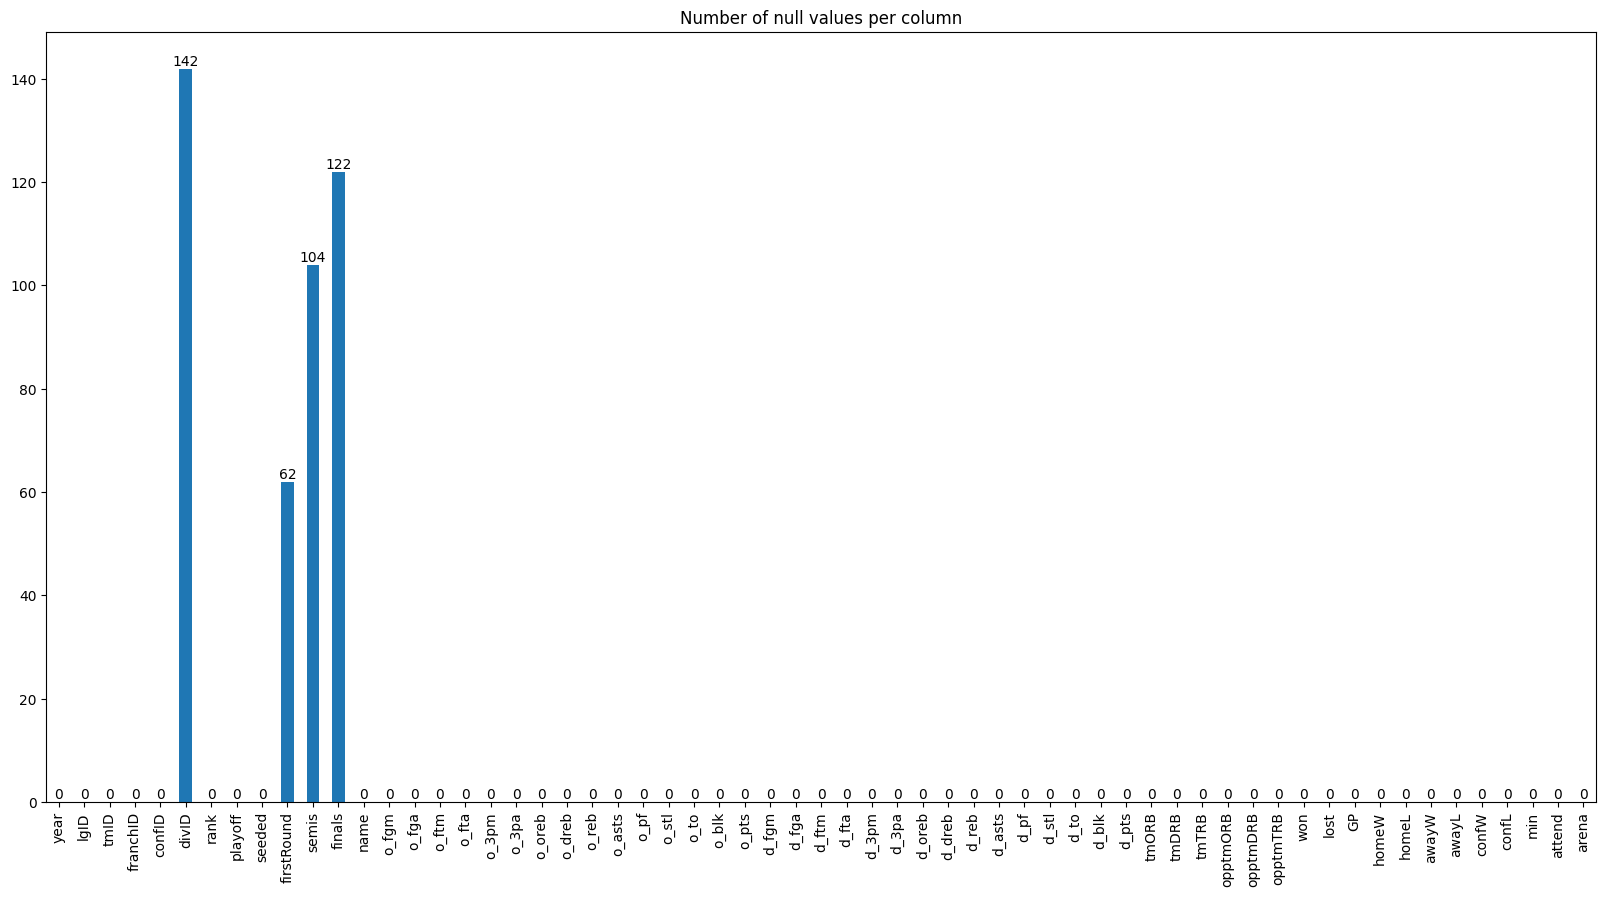

In [5]:
nulls_values_by_column(df, (20, 10))

In [6]:
df.drop(['divID'], inplace=True, axis=1)
df.fillna('N', inplace=True)

## Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

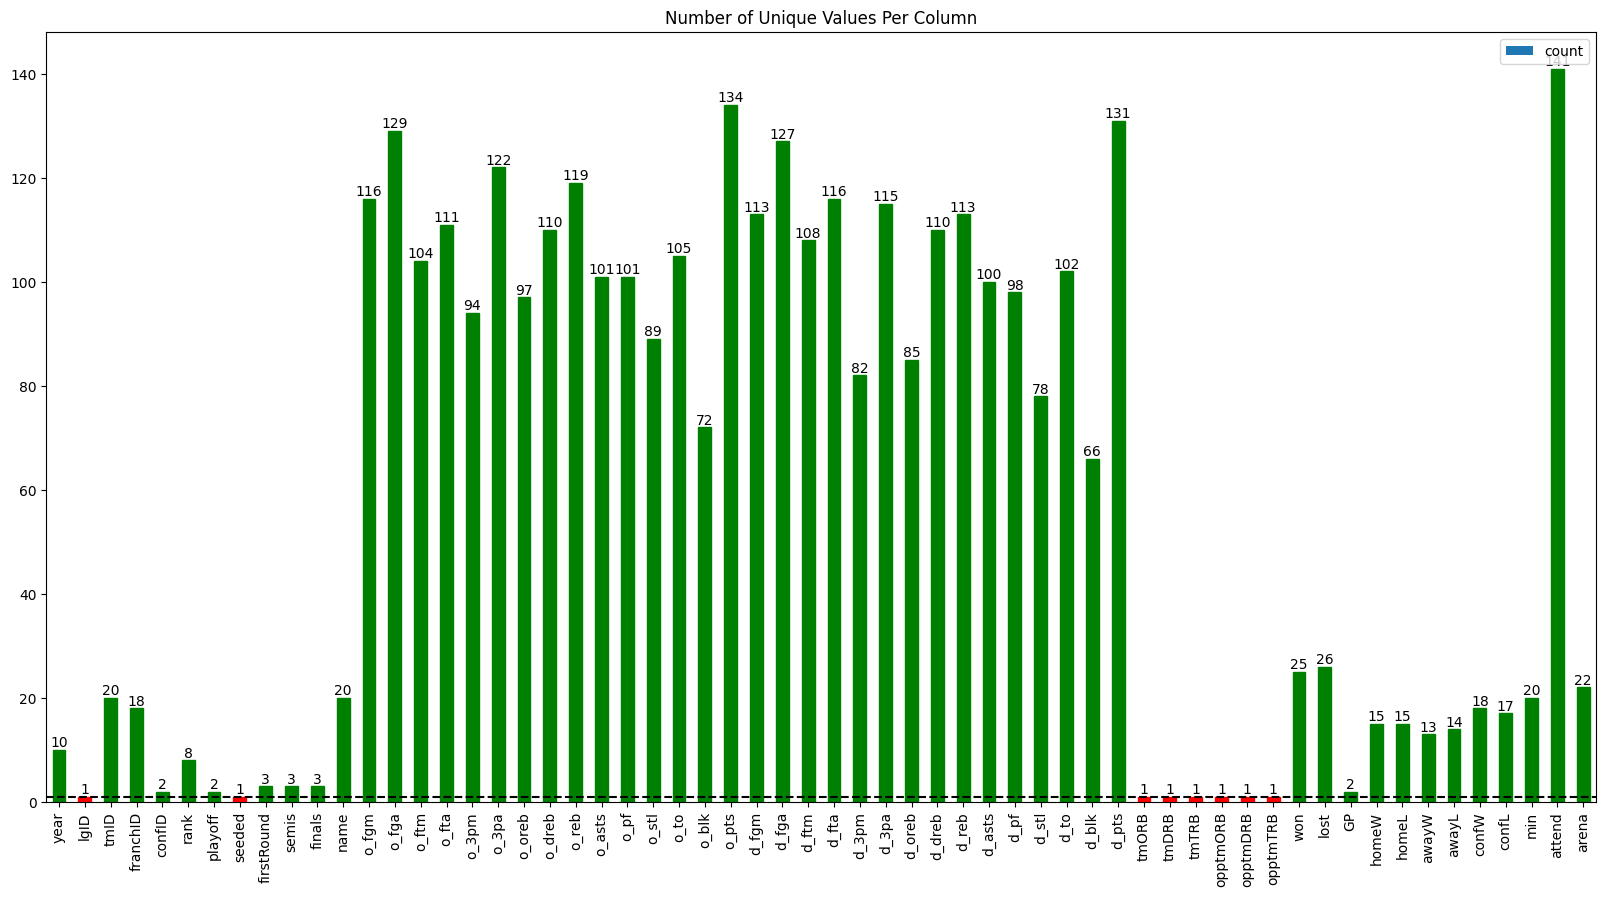

In [7]:
unique_values_by_column(df, 1, (20, 10))

In [8]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 1)
print(f"Removed {num_columns - len(df.columns)} columns that had only one unique value")


Removed 8 columns that had only one unique value


In [9]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


## Outliers and Noise

### Detecting and Removing Outliers using ...

### ... z-score

This is a simple way to detect outliers using the z-score. The z-score is the number of standard deviations away from the mean a data point is. If the absolute value of the z-score is greater than 3, we can flag this data point as an outlier.

Let's take a look at the z-score range using a histogram plot.

In [10]:
max_zscore = 3
rows2drop = set()
histogram_plot(df, max_zscore, (24, 100))

Now let's use the z-score to detect and remove outliers from the dataset.

In [ ]:
rows2drop_zscore = filter_by_zscore(df, max_zscore, ['attend'])
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

Removed 9 rows with zscore > 3


### ... Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The IQR may also be called the midspread or middle 50%. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

Let's take a look at the IQR range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

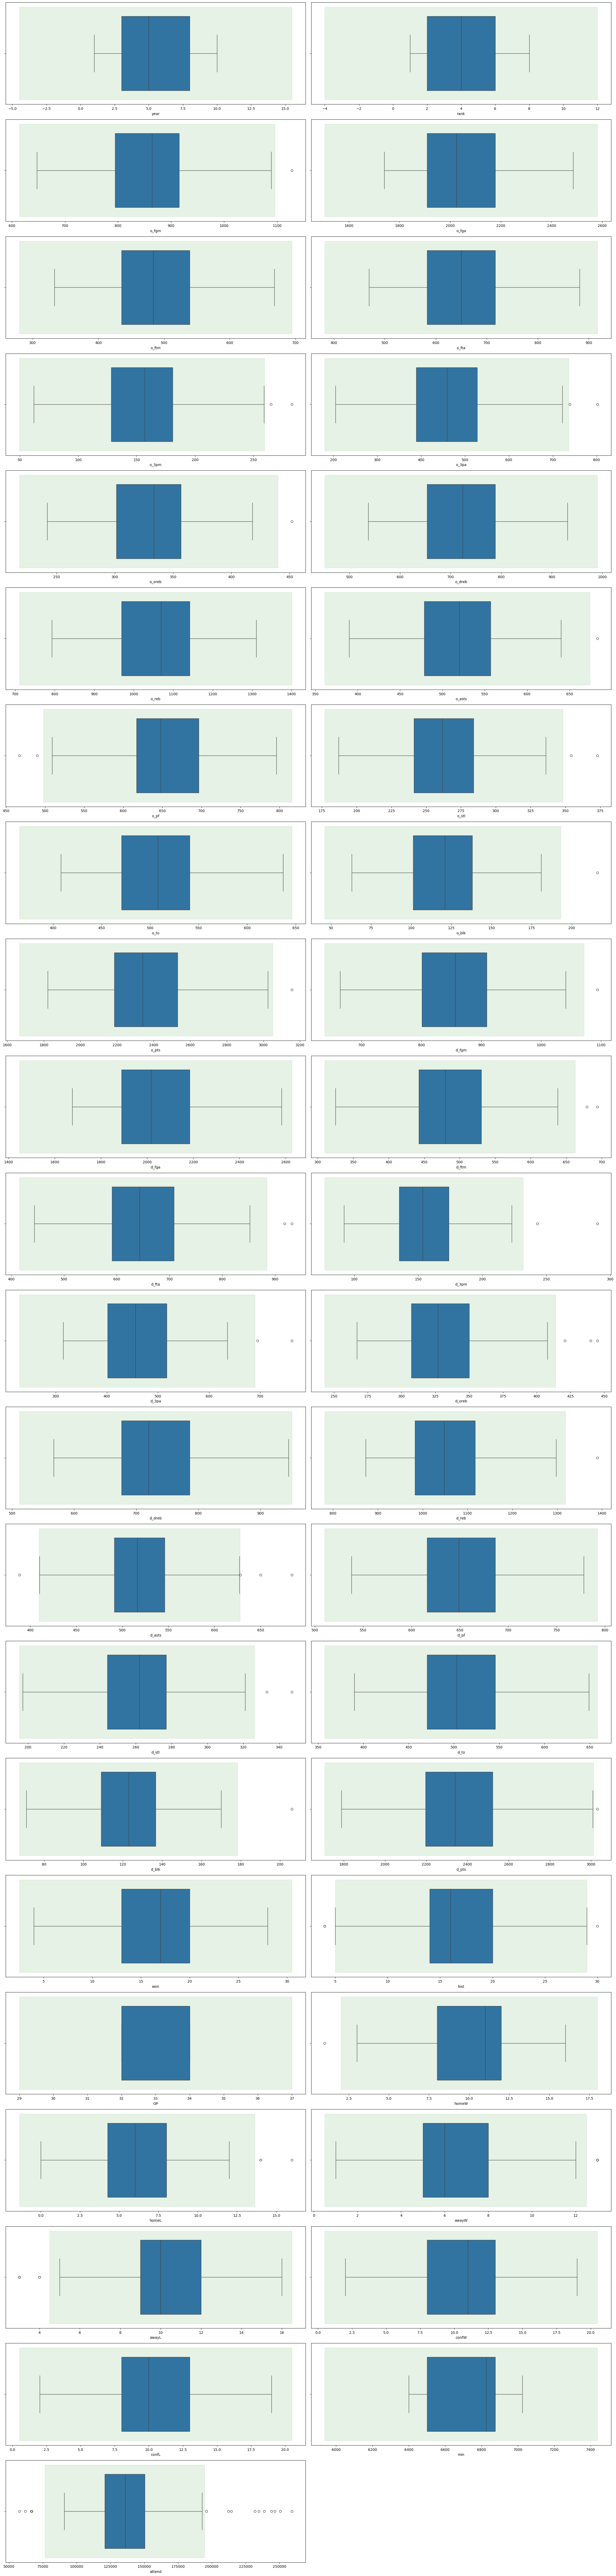

In [ ]:
factor = 1.5
iqr_plot(df, factor, (24, 100))

Now let's use the IQR to detect and remove outliers from the dataset.

In [ ]:
rows2drop_iqr = filter_by_iqr(df, factor, ['attend'])
print(f"Removed {len(rows2drop_iqr)} rows with factor = {factor}")

rows2drop.update(rows2drop_iqr)

Removed 23 rows with factor = 1.5


In [ ]:
print(f"Founded {len(rows2drop)} ({round(len(rows2drop) / df.shape[0] * 100, 1)}%) outliers")
#df.drop(rows2drop, axis = 0, inplace=True)
print(f"Removed {init_num_rows - df.shape[0]} rows ({round((init_num_rows - df.shape[0]) / init_num_rows * 100, 1)}%)")

Founded 23 (16.2%) outliers
Removed 0 rows (0.0%)


## Save Dataset

In [ ]:
if not os.path.exists('../data/clean'):
    os.makedirs('../data/clean')

df.to_csv('../data/clean/teams.csv', index=False)